In [2]:
!unzip /content/archive.zip -d /content

Archive:  /content/archive.zip
  inflating: /content/HousingData.csv  


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [25]:
data = pd.read_csv('/content/HousingData.csv')
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [26]:
data.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [27]:
data.dropna(inplace=True)

In [44]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [45]:
data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


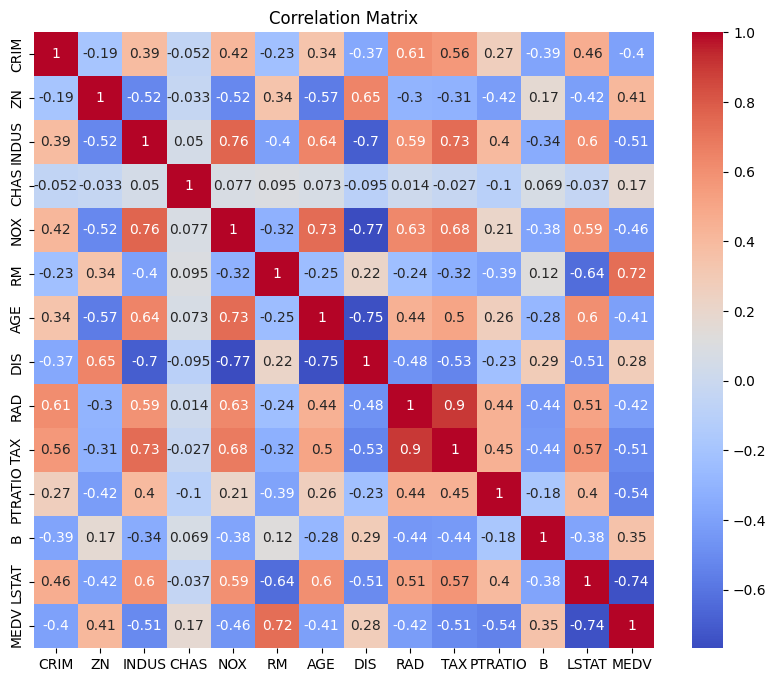

In [46]:
#plotting correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

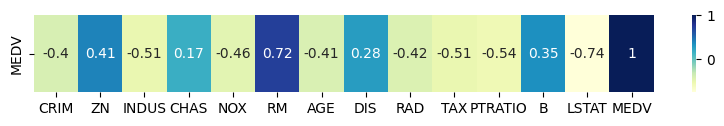

In [47]:
plt.figure(figsize=(10,1))
sns.heatmap(correlation_matrix[['MEDV']].T, annot=True, cmap="YlGnBu")
plt.show()

In [61]:
Reg = tree.DecisionTreeRegressor(random_state=42)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
421,7.02259,0.0,18.10,0.0,0.718,6.006,95.3,1.8746,24,666,20.2,319.98,15.70
232,0.57529,0.0,6.20,0.0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5,276,16.4,396.90,17.92
75,0.09512,0.0,12.83,0.0,0.437,6.286,45.0,4.5026,5,398,18.7,383.23,8.94
439,9.39063,0.0,18.10,0.0,0.740,5.627,93.9,1.8172,24,666,20.2,396.90,22.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


In [64]:
Reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [65]:
Y_pred = Reg.predict(X_test)

In [66]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
print('mean-sqaure-error',mse)
r2

mean-sqaure-error 27.158227848101266


0.6780156625862424

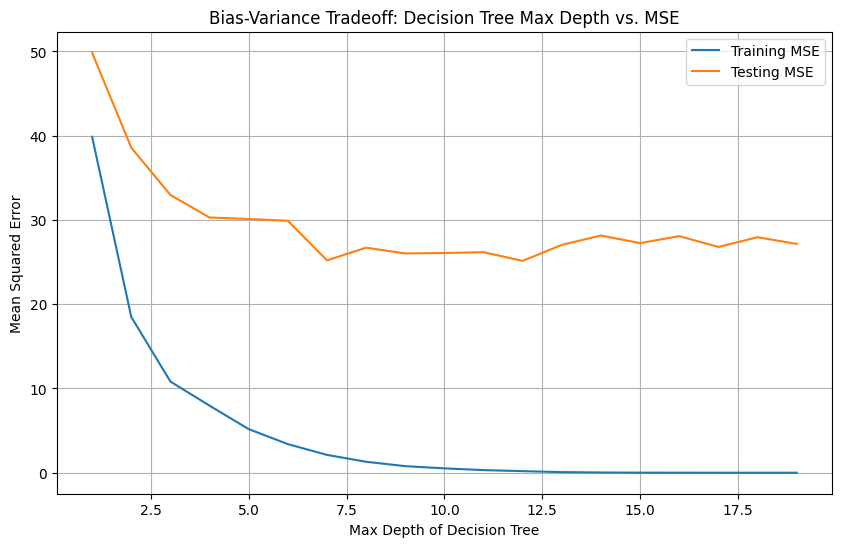

In [70]:
train_errors = []
test_errors = []
depths = range(1, 20)

for depth in depths:
    regressor = tree.DecisionTreeRegressor(max_depth=depth, random_state=42)
    regressor.fit(X_train, y_train)

    y_train_pred = regressor.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_mse)

    y_test_pred = regressor.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(test_mse)

plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, label='Training MSE')
plt.plot(depths, test_errors, label='Testing MSE')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Squared Error')
plt.title('Bias-Variance Tradeoff: Decision Tree Max Depth vs. MSE')
plt.legend()
plt.grid(True)
plt.show()
